Week_2 Day_2
PIMA DIABETES 

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("/content/pima-indians-diabetes.csv")

In [3]:
data.shape


(767, 9)

In [4]:
data.info


<bound method DataFrame.info of      1   6  148  72  35    0  33.6  0.627  50
0    0   1   85  66  29    0  26.6  0.351  31
1    1   8  183  64   0    0  23.3  0.672  32
2    0   1   89  66  23   94  28.1  0.167  21
3    1   0  137  40  35  168  43.1  2.288  33
4    0   5  116  74   0    0  25.6  0.201  30
..  ..  ..  ...  ..  ..  ...   ...    ...  ..
762  0  10  101  76  48  180  32.9  0.171  63
763  0   2  122  70  27    0  36.8  0.340  27
764  0   5  121  72  23  112  26.2  0.245  30
765  1   1  126  60   0    0  30.1  0.349  47
766  0   1   93  70  31    0  30.4  0.315  23

[767 rows x 9 columns]>

In [5]:
data.head()

,1,6,148,72,35,0,33.6,0.627,50
0,0,1,85,66,29,0,26.6,0.351,31
1,1,8,183,64,0,0,23.3,0.672,32
2,0,1,89,66,23,94,28.1,0.167,21
3,1,0,137,40,35,168,43.1,2.288,33
4,0,5,116,74,0,0,25.6,0.201,30


In [6]:
# check for any null value 
data.isnull().values.any()

False

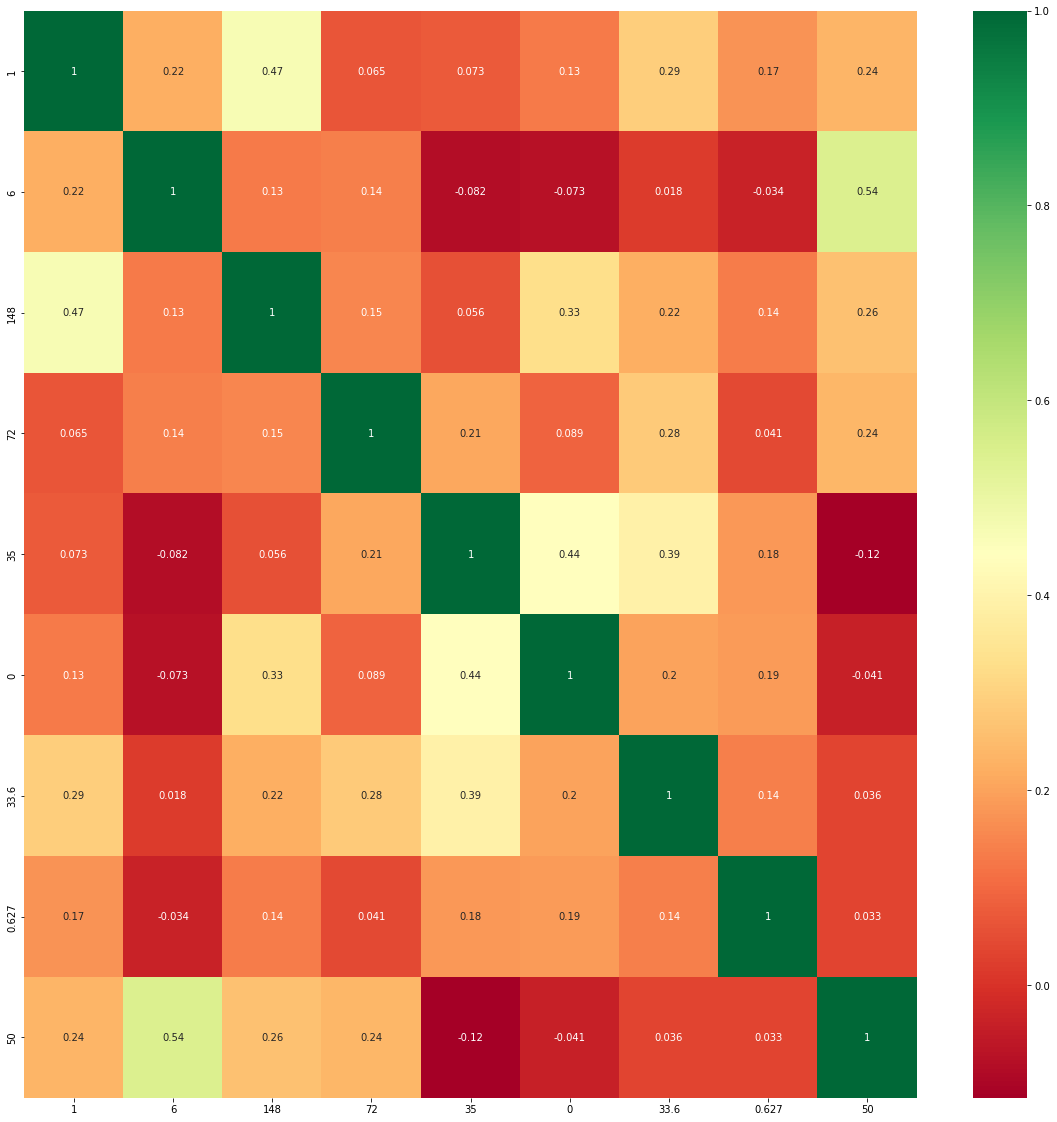

In [7]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
data.corr()

,1,6,148,72,35,0,33.6,0.627,50
1,1.000000,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417
6,0.221087,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018
148,0.465856,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408
72,0.064882,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571
35,0.073265,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873
0,0.131984,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942
33.6,0.292695,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911
0.627,0.173245,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738
50,0.236417,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000


In [9]:
# Neuron Algorithm on the Sonar Dataset
from random import seed
from random import randrange
from csv import reader



In [10]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset



In [11]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup



In [12]:
# Split a dataset into k folds
# Review your 10-fold cross-validation
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

import numpy as np
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    activation = 1/(1 + np.exp(-activation))
    return 1.0 if activation >= 0.5 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)


In [13]:
seed(1)
# load and prepare data
filename = 'pima-indians-diabetes.csv'
dataset = load_csv(filename)
#dataset = dd


In [14]:
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert string class to integers 
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [10.15625, 8.984375, 8.984375]
Mean Accuracy: 9.375%
